In [1]:
import pandas as pd
from adjuster import adjust

In [2]:
%matplotlib inline 
#pd.read_csv("output/5_combined.csv").groupby("report_year").agg({"Grant Payments":'sum'}).plot()

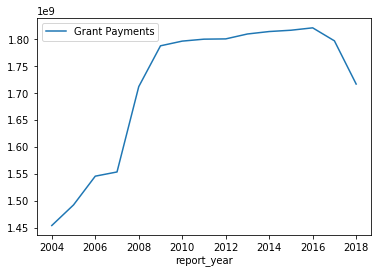

In [3]:
pd.read_csv("output/5_combined.csv").groupby("report_year").agg({"Grant Payments":'sum'}).plot()

In [4]:
pd.options.display.float_format = '{:.2f}'.format
grant_totals_annual = pd.read_csv("output/5_combined.csv").groupby("report_year").agg({"Grant Payments":'sum'}).reset_index()
grant_totals_annual["adjusted"] = grant_totals_annual.apply(
    lambda x: adjust(x["Grant Payments"], x.report_year, 2010),
    axis=1
)
grant_totals_annual["diff"] = grant_totals_annual["Grant Payments"].diff()
grant_totals_annual

Fetching


,report_year,Grant Payments,adjusted,diff
0,2004,1454524550.00,1679024908.81,nan
1,2005,1492783524.00,1666719939.12,38258974.00
2,2006,1546163605.00,1672372277.04,53380081.00
3,2007,1553963572.00,1634592767.27,7799967.00
4,2008,1712452116.00,1734348609.20,158488544.00
5,2009,1788247613.00,1817579818.40,75795497.00
6,2010,1796967608.00,1796967608.00,8719995.00
7,2011,1800577456.00,1745480853.68,3609848.00
8,2012,1801082863.00,1710571377.19,505407.00
9,2013,1810206869.00,1694417720.98,9124006.00


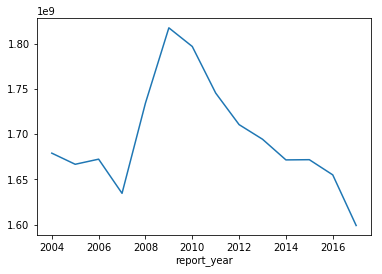

In [5]:
grant_totals_annual.set_index("report_year")["adjusted"].plot()

In [6]:
df = pd.read_csv("output/5_combined.csv").set_index(["City","report_year"])
df.head()

FTE Count  Teacher FTE Count  Counselor FTE Count  \
City    report_year                                                      
ANDOVER 2007             60.90              23.80                  nan   
        2008             58.00              25.30                  nan   
        2009             59.40              25.30                  nan   
        2010             60.00              26.30                  nan   
        2011             59.70              26.30                  nan   

                    has_nulls  Education spending  Inter_Gov_Rev  Enrollment  \
City    report_year                                                            
ANDOVER 2007             True          7507964.00     2438728.00      645.40   
        2008             True          8829049.00     3810247.00      642.14   
        2009             True          8056856.00     2720551.00      641.76   
        2010             True          7844581.00     2378006.00      631.35   
        2011             True          8009858.00     2431822.00      636.48   

                     Grant Payments  wealth_rank  
City    report_year                               
ANDOVER 2007                    nan       108.00  
        2008                    nan       108.00  
        2009                    nan       108.00  
        2010                    nan       108.00  
        2011                    nan       108.00

## Put all money into 2016 dollars

GOING TO HOLD OFF ON THIS.

In [7]:
# ## GOING TO HOLD OFF ON THIS

# def inflate_col(df, col, target_year=2016):
#     return df.apply(lambda x: adjust(x[col], x.name[1], target_year),axis=1)

# df["education_speding_2016_dollars"] = inflate_col(df, "Education spending")
# df

# Drop cities that don't have grants

Cities that don't have education grant payment records include towns without school districts or with regional schools taht complicate this analysis, so we're going to drop them.


In [8]:
df = df[df["Grant Payments"].notnull()]

## Adjust columns for enrollment

In [9]:
df["fte_per_student"] = df["FTE Count"] / df["Enrollment"]
df["spending_per_student"] = df["Education spending"] / df["Enrollment"]
df["grant_payments_per_student"] = df["Grant Payments"] / df["Enrollment"]
df["all_aid_per_student"] = df["Inter_Gov_Rev"] / df["Enrollment"]
df.loc["BRIDGEPORT"]

,FTE Count,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank,fte_per_student,spending_per_student,grant_payments_per_student,all_aid_per_student
report_year,,,,,,,,,,,,,
2004,nan,nan,nan,NaN,nan,nan,nan,140283857.00,165.00,nan,nan,nan,nan
2005,nan,nan,nan,NaN,nan,nan,nan,141629003.00,165.00,nan,nan,nan,nan
2006,nan,nan,nan,NaN,nan,nan,nan,145606964.00,165.00,nan,nan,nan,nan
2007,2854.10,1176.20,112.20,False,211764417.00,203566550.00,22224.65,146274743.00,165.00,0.13,9528.36,6581.64,9159.49
2008,2910.50,1187.20,119.40,False,218222813.00,209554648.00,21801.84,153919745.00,165.00,0.13,10009.38,7059.94,9611.79
2009,2977.80,1204.10,125.20,False,222867074.00,214369477.00,21288.93,161366656.00,165.00,0.14,10468.68,7579.84,10069.53
2010,3011.30,1167.90,128.00,False,205130582.00,185155817.00,21022.70,162835866.00,165.00,0.14,9757.58,7745.72,8807.42
2011,2980.20,1135.30,126.20,False,229559379.00,207535677.00,20949.07,162818647.00,165.00,0.14,10957.97,7772.12,9906.68
2012,2883.50,1098.70,115.60,False,259297544.00,231508096.00,20870.82,162594811.00,165.00,0.14,12423.93,7790.53,11092.43


In [10]:
df["Education spending"].to_frame().join(df["Teacher FTE Count"]).corr()

,Education spending,Teacher FTE Count
Education spending,1.00,0.97
Teacher FTE Count,0.97,1.00


In [11]:
df["Education spending"].pct_change().to_frame().join(df["Teacher FTE Count"].pct_change()).corr()

,Education spending,Teacher FTE Count
Education spending,1.00,0.97
Teacher FTE Count,0.97,1.00


In [12]:
df["Education spending"].pct_change().to_frame().join(df["Grant Payments"].pct_change()).corr()

,Education spending,Grant Payments
Education spending,1.00,-0.01
Grant Payments,-0.01,1.00


In [13]:
df["Education spending"].pct_change().to_frame().join(df["Inter_Gov_Rev"].pct_change()).corr()

,Education spending,Inter_Gov_Rev
Education spending,1.00,0.72
Inter_Gov_Rev,0.72,1.00


In [14]:
df["Teacher FTE Count"].pct_change().to_frame().join(df["Inter_Gov_Rev"].pct_change()).corr()

,Teacher FTE Count,Inter_Gov_Rev
Teacher FTE Count,1.00,0.68
Inter_Gov_Rev,0.68,1.00


In [15]:
(df["Teacher FTE Count"]/df["Enrollment"]).pct_change().to_frame().join(
    (df["Inter_Gov_Rev"]/df["Enrollment"]).pct_change().to_frame(),
    rsuffix="rev"
).corr()

,0,0rev
0,1.00,-0.07
0rev,-0.07,1.00


In [16]:
len(df[df["has_nulls"]==True])

103

In [17]:
df[df["has_nulls"]==True].index.map(lambda x:x[0]).unique()

Index([u'BOZRAH', u'BRANFORD', u'BROOKLYN', u'CANTERBURY', u'COVENTRY',
       u'DERBY', u'EAST WINDSOR', u'EASTFORD', u'FRANKLIN', u'HARTLAND',
       u'LISBON', u'NEW LONDON', u'NORWALK', u'PLYMOUTH', u'POMFRET',
       u'PRESTON', u'SALEM', u'SOMERS', u'SPRAGUE', u'STERLING', u'THOMPSON',
       u'UNION', u'VOLUNTOWN', u'WINCHESTER', u'WOLCOTT'],
      dtype='object')

In [18]:
df.loc["NORWALK"]

,FTE Count,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank,fte_per_student,spending_per_student,grant_payments_per_student,all_aid_per_student
report_year,,,,,,,,,,,,,
2004,nan,nan,nan,NaN,nan,nan,nan,8325127.00,37.00,nan,nan,nan,nan
2005,nan,nan,nan,NaN,nan,nan,nan,8345099.00,37.00,nan,nan,nan,nan
2006,nan,nan,nan,NaN,nan,nan,nan,8644467.00,37.00,nan,nan,nan,nan
2007,1565.90,727.80,58.50,False,145969257.00,28182974.00,10822.43,8681793.00,37.00,0.14,13487.66,802.20,2604.13
2008,1602.50,707.00,56.80,False,153675894.00,28626555.00,10608.33,9540351.00,37.00,0.15,14486.34,899.33,2698.50
2009,1621.80,714.80,60.30,False,160083564.00,30386367.00,10806.39,9953329.00,37.00,0.15,14813.79,921.06,2811.89
2010,956.00,711.80,58.30,True,161411159.00,29162693.00,10941.90,10078320.00,37.00,0.09,14751.66,921.08,2665.23
2011,1595.10,712.20,59.30,False,164604885.00,30083768.00,11158.74,10148702.00,37.00,0.14,14751.21,909.48,2695.98
2012,988.80,740.10,60.80,True,173117163.00,35204996.00,11227.33,10093384.00,37.00,0.09,15419.26,899.00,3135.65


In [19]:
df["wealth_rank"].describe()

count   1830.00
mean      94.16
std       48.22
min        1.00
25%       55.00
50%       99.00
75%      137.00
max      169.00
Name: wealth_rank, dtype: float64